# SentiStrength test

SentiStrength performance on the STS-Gold and the Sentiment140 test datasets

http://sentistrength.wlv.ac.uk

## Initialization

Import needed packages and initialize file paths.

### Imports

Import necessary python packages.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

### Parameters initialization

Initialize filepaths.

In [2]:

# dataset file locations
test_data_csv = '../../data/interim/sentiment140_test_clean.csv'
sts_gold_test_csv = '../../data/interim/sts-gold-clean.csv'

#result file location
ss_results_txt = '../../reports/sentiment140_test0_out.txt'
ss_sts_results_txt = '../../reports/sts-gold_test0_out.txt'

## Test

Compare the predictions from SentiStrength against the labels of the datasets.

### Load datasets and predictions

Load both datasets and results from SentiStrength

#### Load sts-gold test dataset

Load the cleaned STS-Gold dataset and assign the labels to a variable.

In [3]:
df_test_sts = pd.read_csv(sts_gold_test_csv)
test_sts_labels = df_test_sts.polarity

#### Load sentiment140 test dataset

Load the cleaned sentiment140 test and assign labels to a variable.

In [4]:
df_test_140 = pd.read_csv(test_data_csv)
test_140_labels = df_test_140.polarity

#### Load SentiStrength predictions

Load the predictions from SentiStrength from disk.

In [5]:
df_ss_sts_results = pd.read_csv(ss_sts_results_txt, sep='\t')
df_ss_results = pd.read_csv(ss_results_txt, sep='\t')
sts_predict_classes = df_ss_sts_results.Overall.map({-1:0, 1:1})
s140_predict_classes = df_ss_results.Overall.map({-1:0, 1:1})

### Test results

Verify the performance against the test datasets.

#### STS-Gold dataset test

Comapre the results against the STS-Gold dataset.

##### STS-Gold Metrics

Calculate and display the evaluation metrics for the STS-Gold dataset

In [6]:
accuracy = metrics.accuracy_score(test_sts_labels, sts_predict_classes)
precision = metrics.precision_score(test_sts_labels, sts_predict_classes)
recall = metrics.recall_score(test_sts_labels, sts_predict_classes)
f1 = metrics.f1_score(test_sts_labels, sts_predict_classes)
roc_auc = metrics.roc_auc_score(test_sts_labels, sts_predict_classes)
cohen_kappa = metrics.cohen_kappa_score(test_sts_labels, sts_predict_classes)

print('Accuracy:\t{:.2%}'.format(accuracy))
print('Precision:\t{:.2%}'.format(precision))
print('Recall:\t\t{:.2%}'.format(recall))
print('F1:\t\t{:.2%}'.format(f1))
print('ROC AUC:\t{:.2%}'.format(roc_auc))
print('Cohen\'s kappa:\t{:.2%}'.format(cohen_kappa))

Accuracy:	69.12%
Precision:	50.17%
Recall:		94.15%
F1:		65.46%
ROC AUC:	76.00%
Cohen's kappa:	41.90%


##### STS-Gold Confusion Matrix

Calculate and display the confusion matrix.

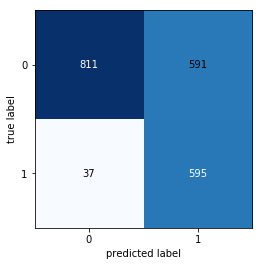

In [7]:
confusion_matrix = metrics.confusion_matrix(test_sts_labels, sts_predict_classes)
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix)
plt.show()

#### Sentiment140 dataset test

Comapre the results against the Sentiment140 test dataset.

##### Sentiment140 Metrics

Calculate and display the evaluation metrics for the Sentiment140 test dataset

In [8]:
accuracy = metrics.accuracy_score(test_140_labels, s140_predict_classes)
precision = metrics.precision_score(test_140_labels, s140_predict_classes)
recall = metrics.recall_score(test_140_labels, s140_predict_classes)
f1 = metrics.f1_score(test_140_labels, s140_predict_classes)
roc_auc = metrics.roc_auc_score(test_140_labels, s140_predict_classes)
cohen_kappa = metrics.cohen_kappa_score(test_140_labels, s140_predict_classes)

print('Accuracy:\t{:.2%}'.format(accuracy))
print('Precision:\t{:.2%}'.format(precision))
print('Recall:\t\t{:.2%}'.format(recall))
print('F1:\t\t{:.2%}'.format(f1))
print('ROC AUC:\t{:.2%}'.format(roc_auc))
print('Cohen\'s kappa:\t{:.2%}'.format(cohen_kappa))

Accuracy:	80.22%
Precision:	75.34%
Recall:		90.66%
F1:		82.29%
ROC AUC:	80.08%
Cohen's kappa:	60.32%


#####  Sentiment140 Confusion Matrix

Calculate and display the confusion matrix for the Sentiment140 dataset.

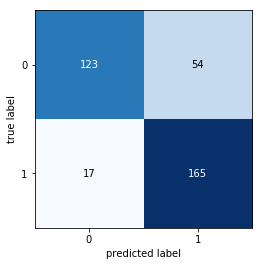

In [9]:
confusion_matrix = metrics.confusion_matrix(test_140_labels, s140_predict_classes)
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix)
plt.show()